## IMPORTING LIBRARIES & DATASET

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
import io
# This module helps us to solve file related input and output operations
from google.colab import files
# for importing files from device to google colab

### For accessing kaggle dataset directly in Colab:

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anjaliyadav23","key":"f5ab288d5c9158eb4870d43149717d3d"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                             title                                         size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  ------------------------------------------  ------  -------------------  -------------  ---------  ---------------  
akshaydattatraykhare/diabetes-dataset                           Diabetes Dataset                               9KB  2022-10-06 08:55:25           8623        277  1.0              
whenamancodes/covid-19-coronavirus-pandemic-dataset             COVID -19 Coronavirus Pandemic Dataset        11KB  2022-09-30 04:05:11           6864        223  1.0              
whenamancodes/students-performance-in-exams                     Students Performance in Exams                  9KB  2022-09-14 15:14:54          12090        222  1.0              
dimitryzub/walmart-coffee-listings-from-500-stores              Walmart Coffee Listings from 50

In [ ]:
! kaggle datasets download -d whenamancodes/students-performance-in-exams

  0% 0.00/8.67k [00:00<?, ?B/s]
100% 8.67k/8.67k [00:00<00:00, 5.17MB/s]


### Unzippping the dataset

In [ ]:
! unzip students-performance-in-exams.zip

Archive:  students-performance-in-exams.zip
  inflating: exams.csv               


In [ ]:
df=pd.read_csv('exams.csv',encoding = 'utf-8')

# DATA EXPLORATION

In [ ]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68
...,...,...,...,...,...,...,...,...
995,male,group C,high school,standard,none,73,70,65
996,male,group D,associate's degree,free/reduced,completed,85,91,92
997,female,group C,some high school,free/reduced,none,32,35,41
998,female,group C,some college,standard,none,73,74,82


In [ ]:
df.shape

(1000, 8)

In [ ]:
df.describe(include='all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,male,group C,some college,standard,none,NaN,NaN,NaN
freq,517,323,222,652,665,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.396000,69.002000,67.738000
std,NaN,NaN,NaN,NaN,NaN,15.402871,14.737272,15.600985
min,NaN,NaN,NaN,NaN,NaN,13.000000,27.000000,23.000000
25%,NaN,NaN,NaN,NaN,NaN,56.000000,60.000000,58.000000
50%,NaN,NaN,NaN,NaN,NaN,66.500000,70.000000,68.000000
75%,NaN,NaN,NaN,NaN,NaN,77.000000,79.000000,79.000000


In [ ]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.819398,0.805944
reading score,0.819398,1.000000,0.954274
writing score,0.805944,0.954274,1.000000


# FEATURE SCALING

###Using labelEncoder

In [ ]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['gender'] = le.fit_transform(df['gender'])
df['race/ethnicity'] = le.fit_transform(df['race/ethnicity'])
df['parental level of education'] = le.fit_transform(df['parental level of education'])
df['lunch'] = le.fit_transform(df['lunch'])
df['test preparation course'] = le.fit_transform(df['test preparation course'])

In [ ]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,0,2,1,0,67,67,63
1,0,3,5,0,1,40,59,55
2,1,4,4,0,1,59,60,50
3,1,1,2,1,1,77,78,68
4,1,4,0,1,0,78,73,68
...,...,...,...,...,...,...,...,...
995,1,2,2,1,1,73,70,65
996,1,3,0,0,0,85,91,92
997,0,2,5,0,1,32,35,41
998,0,2,4,1,1,73,74,82


In [ ]:
df.corr()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
gender,1.000000,0.063231,-0.078676,-0.033962,-0.007653,0.200863,-0.189389,-0.246089
race/ethnicity,0.063231,1.000000,-0.011034,-0.033335,0.029828,0.213156,0.131459,0.133955
parental level of education,-0.078676,-0.011034,1.000000,-0.033616,0.008912,-0.187776,-0.148998,-0.161748
lunch,-0.033962,-0.033335,-0.033616,1.000000,-0.029267,0.374431,0.288282,0.319191
test preparation course,-0.007653,0.029828,0.008912,-0.029267,1.000000,-0.151704,-0.245144,-0.315601
math score,0.200863,0.213156,-0.187776,0.374431,-0.151704,1.000000,0.819398,0.805944
reading score,-0.189389,0.131459,-0.148998,0.288282,-0.245144,0.819398,1.000000,0.954274
writing score,-0.246089,0.133955,-0.161748,0.319191,-0.315601,0.805944,0.954274,1.000000


In [ ]:
df.cov()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
gender,0.249961,0.035799,-0.071244,-0.008092,-0.001807,1.546815,-1.395429,-1.919465
race/ethnicity,0.035799,1.282361,-0.022632,-0.017990,0.015951,3.717962,2.193872,2.366549
parental level of education,-0.071244,-0.022632,3.280520,-0.029017,0.007623,-5.238563,-3.977115,-4.570492
lunch,-0.008092,-0.017990,-0.029017,0.227123,-0.006587,2.748557,2.024721,2.373197
test preparation course,-0.001807,0.015951,0.007623,-0.006587,0.222998,-1.103443,-1.706036,-2.325095
math score,1.546815,3.717962,-5.238563,2.748557,-1.103443,237.248432,186.000208,193.668420
reading score,-1.395429,2.193872,-3.977115,2.024721,-1.706036,186.000208,217.187183,219.402927
writing score,-1.919465,2.366549,-4.570492,2.373197,-2.325095,193.668420,219.402927,243.390747


# DATA VISUALIZATION

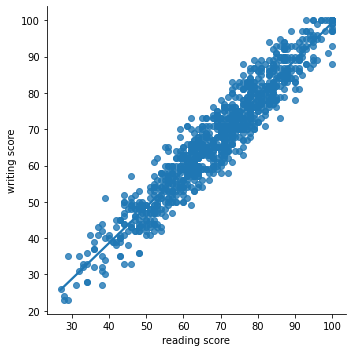

In [ ]:
#plotting the Scatter plot to check relationship between Sal and Temp
sns.lmplot(x ="reading score", y ="writing score", data = df, order = 2, ci = None)

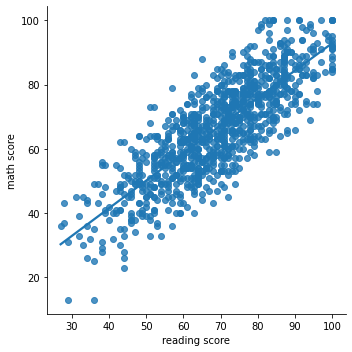

In [ ]:
#plotting the Scatter plot to check relationship between Sal and Temp
sns.lmplot(x ="reading score", y ="math score", data = df, order = 2, ci = None)

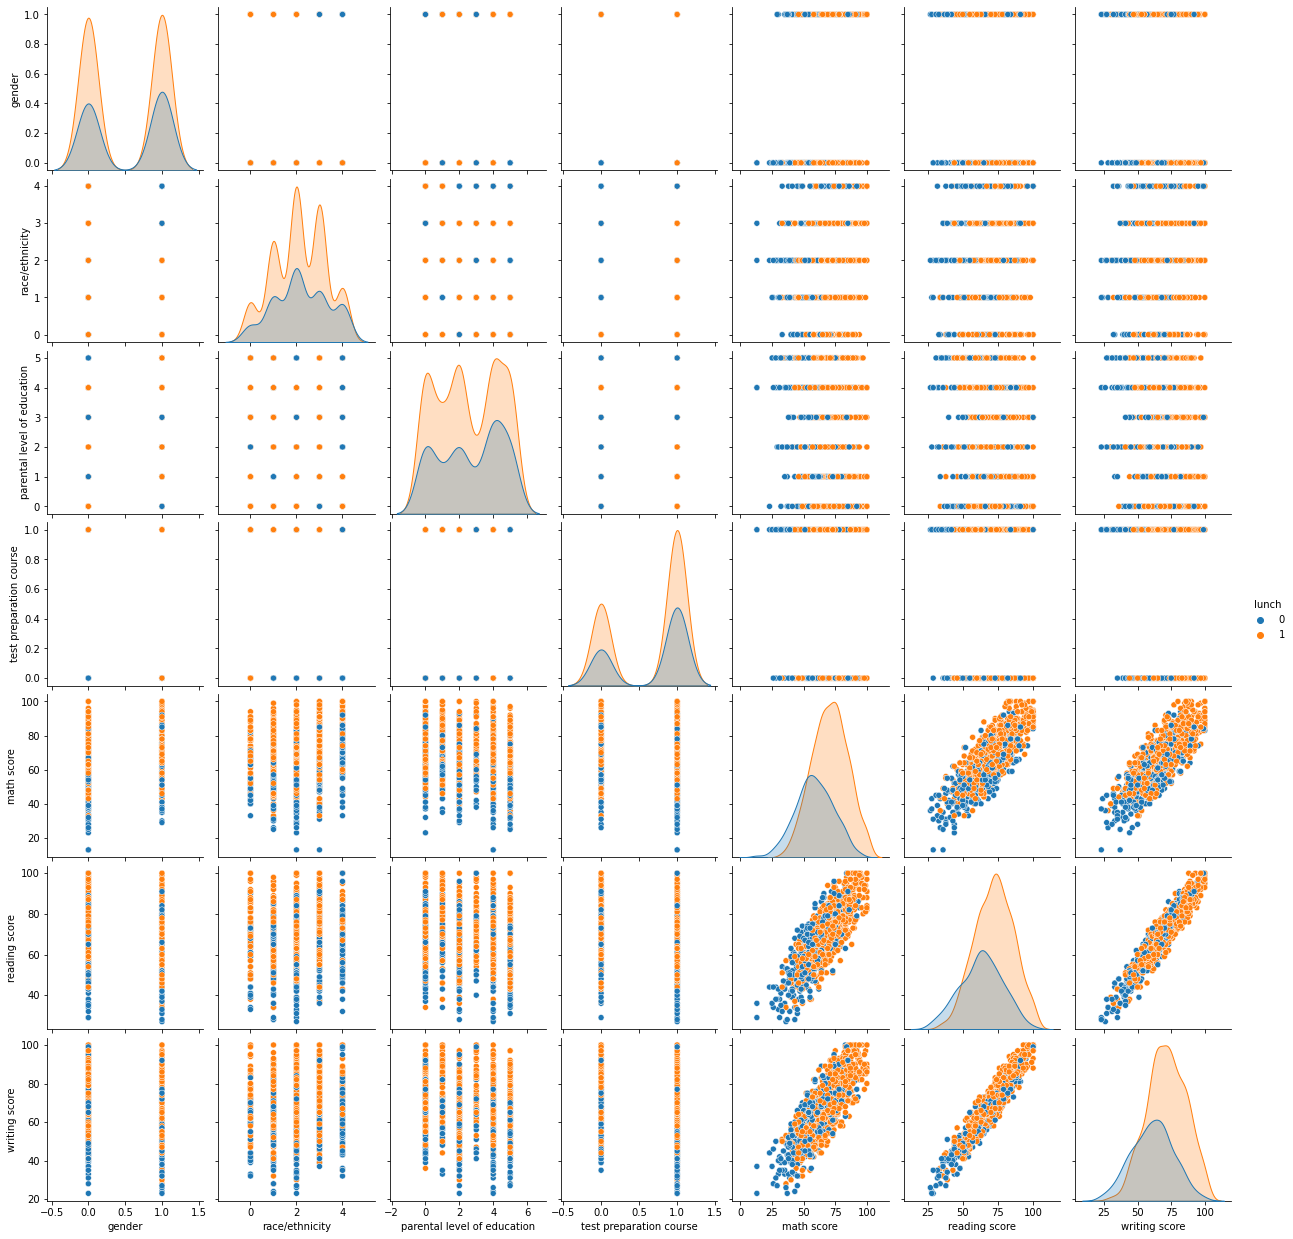

In [ ]:
import seaborn as sns

sns.pairplot(df,hue='lunch')

# SIMPLE LINEAR REGRESSION

Lets just make as linear regression with two attributes.

Suppose we take the Dependent attribute as writing score, we see that the attribute which contributes the most to it is reading score.

In [ ]:
x1 = df.iloc[:,6:7].values
y1 = df.iloc[:,5:6].values

In [ ]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x1, y1, test_size= 1/3, random_state=0)

### Fitting the Simple Linear Regression to the Training Set

In [ ]:
from sklearn.linear_model import LinearRegression  
regressor= LinearRegression()  
regressor.fit(x_train, y_train)

LinearRegression()

### Prediction of test set result

In [ ]:
#Prediction of Test and Training set result  
y_pred= regressor.predict(x_test)  
x_pred= regressor.predict(x_train) 

### Visualizing the Training set results

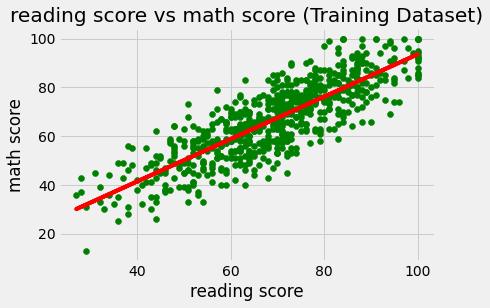

In [ ]:
plt.scatter(x_train, y_train, color="green")   
plt.plot(x_train, x_pred, color="red")    
plt.title("reading score vs math score (Training Dataset)")  
plt.xlabel("reading score")  
plt.ylabel("math score")  
plt.show() 

### Visualizing the Test set results

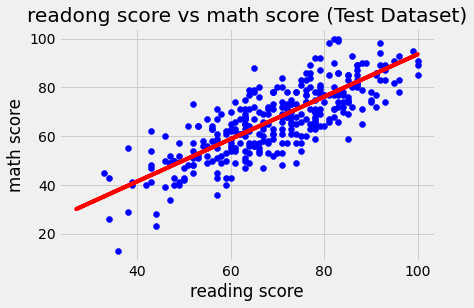

In [ ]:
plt.scatter(x_test, y_test, color="blue")   
plt.plot(x_train, x_pred, color="red")    
plt.title("readong score vs math score (Test Dataset)")  
plt.xlabel("reading score")  
plt.ylabel("math score")  
plt.show()

# MULTIPLE LINEAR REGRESSION

Multiple Linear Regression is one of the important regression algorithms which models the linear relationship between a single dependent continuous variable and more than one independent variable.

In [ ]:
df_math = df.drop(columns = ['parental level of education'])

In [ ]:
df_math

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score
0,1,0,1,0,67,67,63
1,0,3,0,1,40,59,55
2,1,4,0,1,59,60,50
3,1,1,1,1,77,78,68
4,1,4,1,0,78,73,68
...,...,...,...,...,...,...,...
995,1,2,1,1,73,70,65
996,1,3,0,0,85,91,92
997,0,2,0,1,32,35,41
998,0,2,1,1,73,74,82


In [ ]:
df_new  = df_math.iloc[:,0:5]
df_new

,gender,race/ethnicity,lunch,test preparation course,math score
0,1,0,1,0,67
1,0,3,0,1,40
2,1,4,0,1,59
3,1,1,1,1,77
4,1,4,1,0,78
...,...,...,...,...,...
995,1,2,1,1,73
996,1,3,0,0,85
997,0,2,0,1,32
998,0,2,1,1,73


In [ ]:
x = df_new.iloc[:, 0:4].values
y = df_new.iloc[:,4:5].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y,test_size = 0.4, random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [ ]:
print(regressor.intercept_)

[51.1744319]


In [ ]:
print(regressor.coef_)

[[ 6.5874922   2.94379746 13.40566631 -4.21400876]]


In [ ]:
print('Variance score: {}'.format(regressor.score(X_test, Y_test)))

Variance score: 0.2235900024855768


In [ ]:
#Prediction of Test and Training set result  
Y_pred= regressor.predict(X_test)  
X_pred= regressor.predict(X_train)

In [ ]:
print('Train Score: ', regressor.score(X_train, Y_train))  
print('Test Score: ', regressor.score(X_test, Y_test))

Train Score:  0.2644212544048862
Test Score:  0.2235900024855768


Residual = Observed – Predicted

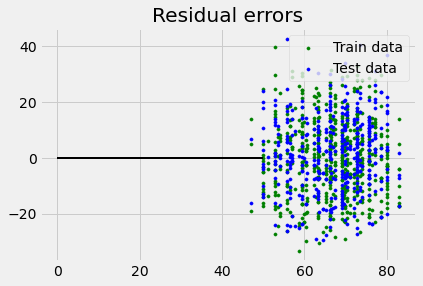

In [ ]:
## setting plot style
plt.style.use('fivethirtyeight')

## plotting residual errors in training data
plt.scatter(X_pred, X_pred - y_train, color = "green", s = 10, label = 'Train data')

## plotting residual errors in test data
plt.scatter(y_pred, y_pred - y_test, color = "blue", s = 10, label = 'Test data')

## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)

## plotting legend
plt.legend(loc = 'upper right')

## plot title
plt.title("Residual errors")

## method call for showing the plot
plt.show()